In [2]:
#!/bin/bash
!kaggle datasets download vishakhdapat/imdb-movie-reviews
!curl -L -o ~/Downloads/imdb-movie-reviews.zip\https://www.kaggle.com/api/v1/datasets/download/vishakhdapat/imdb-movie-reviews

Dataset URL: https://www.kaggle.com/datasets/vishakhdapat/imdb-movie-reviews
License(s): MIT
 97% 25.0M/25.7M [00:02<00:00, 17.0MB/s]
100% 25.7M/25.7M [00:02<00:00, 12.5MB/s]
curl: no URL specified!
curl: try 'curl --help' or 'curl --manual' for more information


In [3]:
import os
import zipfile

#file path
zip_path="imdb-movie-reviews.zip"

#extract the database
with zipfile.ZipFile(zip_path,'r') as zip_ref:
    zip_ref.extractall("dataset")

#Extracted file
print(os.listdir("dataset"))


['IMDB Dataset.csv']


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("dataset/IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
df.shape

(50000, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [8]:
df.isnull().sum()

,0
review,0
sentiment,0


In [9]:
df.isna().sum()

,0
review,0
sentiment,0


In [10]:
df.duplicated().sum()

418

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(49582, 2)

In [13]:
df.describe()

,review,sentiment
count,49582,49582
unique,49582,2
top,One of the other reviewers has mentioned that ...,positive
freq,1,24884


In [14]:
positive_reviews=df[df['sentiment']=='positive']
negative_reviews=df[df['sentiment']=='negative']

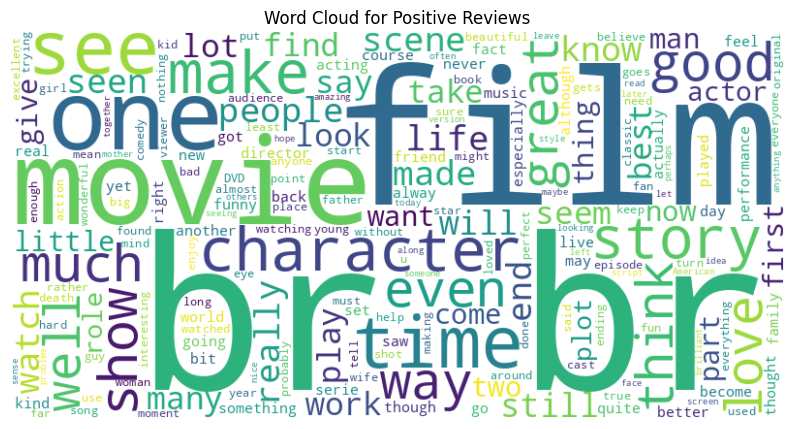

In [15]:
#To see frequency of words in positive

from wordcloud import WordCloud

positive_reviews = df[df['sentiment'] == 'positive']['review'].values
positive_reviews_text = ' '.join(positive_reviews)

plt.figure(figsize=(10, 8))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')
plt.show()

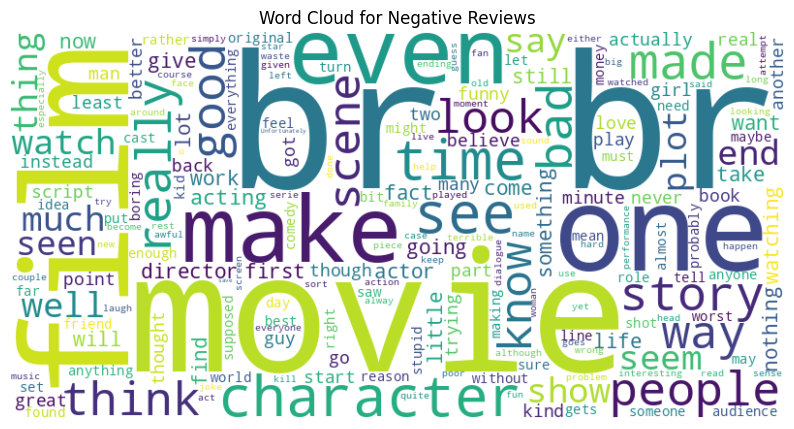

In [16]:
#To see frequency of words in negative reviews

from wordcloud import WordCloud

negative_reviews = df[df['sentiment'] == 'negative']['review'].values
negative_reviews_text = ' '.join(negative_reviews)

plt.figure(figsize=(10, 8))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')
plt.show()

In [17]:
df['sentiment'] = df['sentiment'].apply(lambda x: 1 if x == "positive" else 0)


In [18]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [19]:
df['sentiment'].value_counts()

,count
sentiment,
1,24884
0,24698


In [20]:
#to remove html tags and punctuation marks
import re


def remove_html_tags(text):
    return re.sub(r'<.!*?>', '', text)

df['review']=df['review'].apply(remove_html_tags)


In [21]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


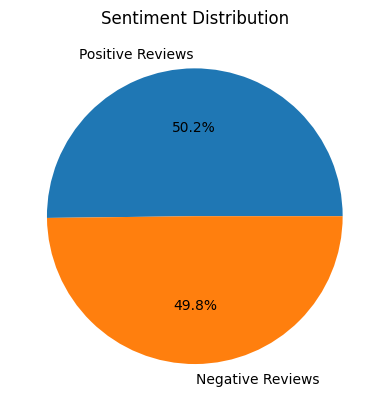

In [22]:
sentiment_count=df['sentiment'].value_counts()
plt.pie(sentiment_count,labels=['Positive Reviews','Negative Reviews'],autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()

In [23]:
!pip install Tensorflow

In [24]:
!pip install keras

In [25]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding , LSTM , Dense, Dropout

In [26]:
tokenizer=Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['review'])
sequences=tokenizer.texts_to_sequences(df['review'])

In [27]:
maxlen=200
X=pad_sequences(sequences,maxlen=maxlen)
y=df['sentiment'].values

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [29]:
model=Sequential([
    Embedding(input_dim=10000,output_dim=128,input_length=maxlen),
    LSTM(128,return_sequences=False),
    Dropout(0.5),
    Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [30]:
#Train the model
LSTM_Model=model.fit(X_train,y_train,epochs=5,batch_size=64,validation_split=0.2)


Epoch 1/5
496/496 ━━━━━━━━━━━━━━━━━━━━ 299s 598ms/step - accuracy: 0.7168 - loss: 0.5338 - val_accuracy: 0.8562 - val_loss: 0.3320
Epoch 2/5
496/496 ━━━━━━━━━━━━━━━━━━━━ 306s 565ms/step - accuracy: 0.9038 - loss: 0.2515 - val_accuracy: 0.8705 - val_loss: 0.3401
Epoch 3/5
496/496 ━━━━━━━━━━━━━━━━━━━━ 273s 551ms/step - accuracy: 0.9316 - loss: 0.1817 - val_accuracy: 0.8823 - val_loss: 0.3395
Epoch 4/5
496/496 ━━━━━━━━━━━━━━━━━━━━ 276s 557ms/step - accuracy: 0.9524 - loss: 0.1340 - val_accuracy: 0.8761 - val_loss: 0.3984
Epoch 5/5
496/496 ━━━━━━━━━━━━━━━━━━━━ 319s 551ms/step - accuracy: 0.9633 - loss: 0.1066 - val_accuracy: 0.8613 - val_loss: 0.3760


In [31]:
X_train

array([[   0,    0,    0, ...,  346,  203,  133],
       [   0,    0,    0, ..., 4367,    2, 2750],
       [  28,  154,   77, ...,  413,   25,  195],
       ...,
       [   2,   24, 1696, ...,    3,  454,  156],
       [   0,    0,    0, ...,  103,  125, 7593],
       [   0,    0,    0, ...,    4,    1, 2904]], dtype=int32)

In [32]:
y_train

array([0, 0, 1, ..., 0, 1, 1])

In [33]:
X_test

array([[   0,    0,    0, ...,    7,  233,  156],
       [ 399,  908,  117, ...,   37,   11,   27],
       [   8,  978,  766, ...,    1, 3978, 2807],
       ...,
       [ 261,   21,   37, ...,    7,    7,    7],
       [   0,    0,    0, ...,    1,  306,  317],
       [   0,    0,    0, ...,   81,   14,  665]], dtype=int32)

In [34]:
y_test

array([0, 1, 0, ..., 0, 0, 0])

In [35]:
#model Evaluation
loss,accuracy=model.evaluate(X_test,np.array(y_test))
print("Test Accuracy is ",accuracy)

310/310 ━━━━━━━━━━━━━━━━━━━━ 37s 121ms/step - accuracy: 0.8587 - loss: 0.3639
Test Accuracy is  0.8615508675575256


In [ ]:
model.summary()

In [41]:

def predict_sentiment():
    input_text = input("Enter Your Movie Review Here: ")

    sequence = tokenizer.texts_to_sequences([input_text])
    padded_sequence = pad_sequences(sequence, maxlen=maxlen)

    prediction = model.predict(padded_sequence)[0][0]

    if prediction > 0.5:
        sentiment = "Positive"
    else:
        sentiment = "Negative"

    print(f"Predicted Sentiment: {sentiment}")


In [42]:
predict_sentiment()

Enter Your Movie Review Here: excellent 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Predicted Sentiment: Positive


In [43]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['review'])


In [44]:
import pickle

with open('tokenizer.pkl', 'wb') as file:
    pickle.dump(tokenizer, file)



In [45]:
with open('tokenizer.pkl', 'rb') as file:
    tokenizer = pickle.load(file)

print("Tokenizer loaded successfully!")


Tokenizer loaded successfully!


In [40]:
from tensorflow.keras.models import load_model
model.save('lstm_model.keras')
loaded_model=load_model('lstm_model.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
